In [52]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
BATCH_SIZE = 16
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d arjuntejaswi/plant-village

Dataset URL: https://www.kaggle.com/datasets/arjuntejaswi/plant-village
License(s): unknown
100% 327M/329M [00:02<00:00, 177MB/s]
100% 329M/329M [00:02<00:00, 163MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/plant-village.zip','r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
!rm -rf /content/PlantVillage/Pepper__bell___Bacterial_spot

In [ ]:
import os
import shutil

def delete_folders_except(directory, keep_folders):
    """
    Delete all folders in the specified directory except for the ones listed in keep_folders.

    Args:
    - directory: Path to the directory containing the folders.
    - keep_folders: List of folder names to keep.
    """
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        # Check if it's a directory and not in the keep_folders list
        if os.path.isdir(folder_path) and folder not in keep_folders:
            print(f"Deleting folder: {folder}")
            shutil.rmtree(folder_path)

# Path to your folder in Colab
directory = '/content/PlantVillage'  # Update this with your directory path

# List of 3 folders to keep
keep_folders = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']  # Update with the names of folders you want to keep

# Delete all folders except the ones listed
delete_folders_except(directory, keep_folders)


Deleting folder: Tomato__Target_Spot
Deleting folder: Tomato_Bacterial_spot
Deleting folder: Pepper__bell___healthy
Deleting folder: Tomato_Leaf_Mold
Deleting folder: Tomato_Early_blight
Deleting folder: Pepper__bell___Bacterial_spot
Deleting folder: Tomato_Septoria_leaf_spot
Deleting folder: Tomato_healthy
Deleting folder: Tomato__Tomato_YellowLeaf__Curl_Virus
Deleting folder: Tomato__Tomato_mosaic_virus
Deleting folder: Tomato_Late_blight
Deleting folder: Tomato_Spider_mites_Two_spotted_spider_mite


In [2]:
import os
import random
import shutil
from math import floor

# Paths to the directories
plant_village_dir = '/content/PlantVillage'
train_dir = '/content/train'
test_dir = '/content/test'

# Create directories for train and test if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Function to split the data
def split_data(source_dir, train_dir, test_dir, split_ratio=0.8):
    # Get the subfolder names (i.e., the class labels)
    class_names = os.listdir(source_dir)

    for class_name in class_names:
        class_source_dir = os.path.join(source_dir, class_name)
        class_train_dir = os.path.join(train_dir, class_name)
        class_test_dir = os.path.join(test_dir, class_name)

        # Create class directories in train and test folders
        os.makedirs(class_train_dir, exist_ok=True)
        os.makedirs(class_test_dir, exist_ok=True)

        # Get list of all files (images) in the class directory
        all_files = os.listdir(class_source_dir)
        total_files = len(all_files)
        random.shuffle(all_files)  # Shuffle the files to randomize selection

        # Calculate the number of files for training (80%) and testing (20%)
        train_size = floor(total_files * split_ratio)
        train_files = all_files[:train_size]
        test_files = all_files[train_size:]

        # Copy training files
        for file_name in train_files:
            src_file = os.path.join(class_source_dir, file_name)
            dest_file = os.path.join(class_train_dir, file_name)
            shutil.copy(src_file, dest_file)

        # Copy testing files
        for file_name in test_files:
            src_file = os.path.join(class_source_dir, file_name)
            dest_file = os.path.join(class_test_dir, file_name)
            shutil.copy(src_file, dest_file)

# Split the data with an 80-20 ratio
split_data(plant_village_dir, train_dir, test_dir, split_ratio=0.8)

print("Data successfully split into train and test folders!")


Data successfully split into train and test folders!


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1721 files belonging to 3 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 431 files belonging to 3 classes.


In [23]:

cnn = tf.keras.models.Sequential()

In [21]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[184.   179.   176.  ]
   [183.5  178.5  175.5 ]
   [184.   179.   176.  ]
   ...
   [197.75 191.75 193.75]
   [195.5  189.5  191.5 ]
   [203.75 197.75 199.75]]

  [[179.5  174.5  171.5 ]
   [180.5  175.5  172.5 ]
   [183.25 178.25 175.25]
   ...
   [196.   190.   192.  ]
   [197.5  191.5  193.5 ]
   [198.75 192.75 194.75]]

  [[183.25 178.25 175.25]
   [173.5  168.5  165.5 ]
   [172.25 167.25 164.25]
   ...
   [194.5  188.5  190.5 ]
   [199.25 193.25 195.25]
   [200.5  194.5  196.5 ]]

  ...

  [[143.   135.   133.  ]
   [143.   135.   133.  ]
   [148.   140.   138.  ]
   ...
   [145.75 139.75 141.75]
   [149.   143.   145.  ]
   [144.75 138.75 140.75]]

  [[154.5  146.5  144.5 ]
   [138.5  130.5  128.5 ]
   [139.   131.   129.  ]
   ...
   [149.   143.   145.  ]
   [153.25 147.25 149.25]
   [156.5  150.5  152.5 ]]

  [[137.25 129.25 127.25]
   [138.75 130.75 128.75]
   [145.5  137.5  135.5 ]
   ...
   [160.5  154.5  156.5 ]
   [157.   151.   153.  ]
   [152.25 146.25 14

**Building convolutional layer**

In [24]:

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [27]:

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [30]:
cnn.add(tf.keras.layers.Flatten())

In [31]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [32]:

cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [33]:

#Output Layer
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

**Compiling and training**


In [34]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [36]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
54/54 [==============================] - 24s 421ms/step - loss: 0.9108 - accuracy: 0.5276 - val_loss: 0.7219 - val_accuracy: 0.7285
Epoch 2/10
54/54 [==============================] - 22s 410ms/step - loss: 0.5806 - accuracy: 0.7653 - val_loss: 0.5150 - val_accuracy: 0.7564
Epoch 3/10
54/54 [==============================] - 22s 405ms/step - loss: 0.3932 - accuracy: 0.8379 - val_loss: 0.2944 - val_accuracy: 0.8585
Epoch 4/10
54/54 [==============================] - 22s 404ms/step - loss: 0.2768 - accuracy: 0.8908 - val_loss: 0.2054 - val_accuracy: 0.9165
Epoch 5/10
54/54 [==============================] - 22s 407ms/step - loss: 0.1748 - accuracy: 0.9303 - val_loss: 0.2567 - val_accuracy: 0.9002
Epoch 6/10
54/54 [==============================] - 22s 403ms/step - loss: 0.1584 - accuracy: 0.9436 - val_loss: 0.1223 - val_accuracy: 0.9536
Epoch 7/10
54/54 [==============================] - 22s 411ms/step - loss: 0.1036 - accuracy: 0.9605 - val_loss: 0.1186 - val_accuracy: 0.9536

**Evaluation of model**

In [37]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

54/54 [==============================] - 4s 65ms/step - loss: 0.0175 - accuracy: 0.9965
Training accuracy: 0.9965136647224426


In [38]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

14/14 [==============================] - 1s 63ms/step - loss: 0.0638 - accuracy: 0.9675
Validation accuracy: 0.9675173759460449


In [39]:

cnn.save('trained_plant_disease_model.keras')

In [40]:
training_history.history #Return Dictionary of history

{'loss': [0.9107972383499146,
  0.5805724859237671,
  0.3932163119316101,
  0.27684125304222107,
  0.17479704320430756,
  0.1583523452281952,
  0.1036287471652031,
  0.06008297950029373,
  0.08432544022798538,
  0.06255915015935898],
 'accuracy': [0.5276002287864685,
  0.7652527689933777,
  0.8378849625587463,
  0.8907611966133118,
  0.9302731156349182,
  0.9436374306678772,
  0.9604880809783936,
  0.9773387312889099,
  0.9686229228973389,
  0.9796630144119263],
 'val_loss': [0.7219423651695251,
  0.5150202512741089,
  0.29441991448402405,
  0.20540247857570648,
  0.25667160749435425,
  0.1222604364156723,
  0.11861566454172134,
  0.09257760643959045,
  0.10344234853982925,
  0.06377621740102768],
 'val_accuracy': [0.7285382747650146,
  0.7563804984092712,
  0.8584686517715454,
  0.9164733290672302,
  0.9002320170402527,
  0.953596293926239,
  0.953596293926239,
  0.9651972055435181,
  0.9559164643287659,
  0.9675173759460449]}

In [41]:

#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [42]:

print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**Accuracy visualisation**

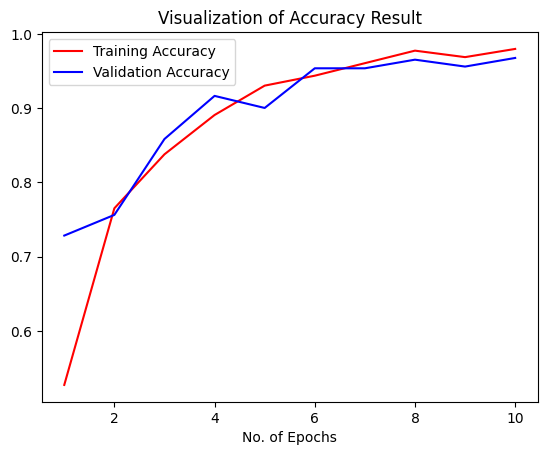

In [43]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [57]:
class_name = validation_set.class_names

In [58]:
class_name


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [45]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 431 files belonging to 3 classes.


In [46]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

431/431 [==============================] - 5s 11ms/step


In [47]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [48]:

Y_true

<tf.Tensor: shape=(431,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     

In [49]:
predicted_categories

<tf.Tensor: shape=(431,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     

In [50]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [51]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                       precision    recall  f1-score   support

Potato___Early_blight       0.98      0.98      0.98       200
 Potato___Late_blight       0.96      0.97      0.97       200
     Potato___healthy       0.90      0.87      0.89        31

             accuracy                           0.97       431
            macro avg       0.95      0.94      0.94       431
         weighted avg       0.97      0.97      0.97       431



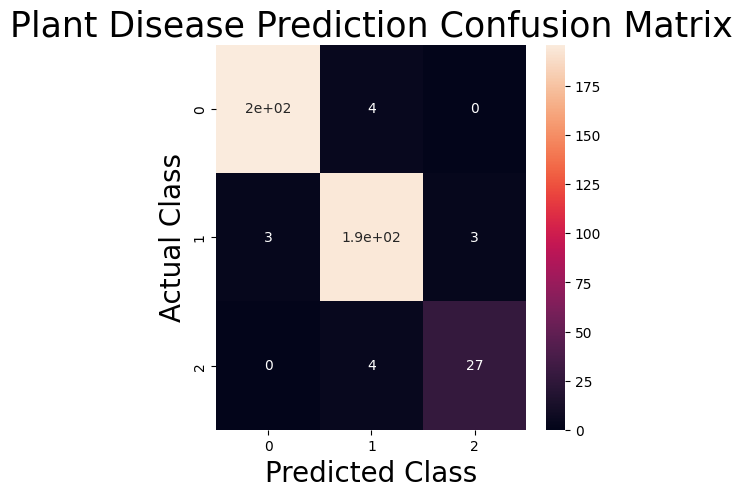

In [56]:
#plotting confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()


In [63]:
import numpy as np

In [64]:
image_path='/content/PlantVillage/Potato___Late_blight/0085ef03-aec3-431a-99a1-de286e10c0cf___RS_LB 2949.JPG'

In [65]:
#testing

image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])
print(input_arr.shape)


(1, 128, 128, 3)


In [69]:
predictions=model.predict(input_arr)
print(predictions)

1/1 [==============================] - 0s 146ms/step
[[3.0290238e-03 9.9680114e-01 1.6980949e-04]]


In [70]:
class_names=['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]
print(predicted_class)

Potato___Late_blight


In [68]:
model=tf.keras.models.load_model('/content/trained_plant_disease_model.keras')